In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from scipy.stats import linregress
from retry_requests import retry

In [21]:
suicide_data_path = "../data/suicide_data.csv"
suicide_data = pd.read_csv(suicide_data_path)

weather_data_path = "../data/weather_data.csv"
weather_data = pd.read_csv(weather_data_path)

In [22]:
data_merge = weather_data.merge(suicide_data, how="right", on="country")

data_merge = data_merge.dropna()

data_merge.to_csv("../data/weather_v_suicide.csv", index=False)

The r-squared is: 0.0946009854236267


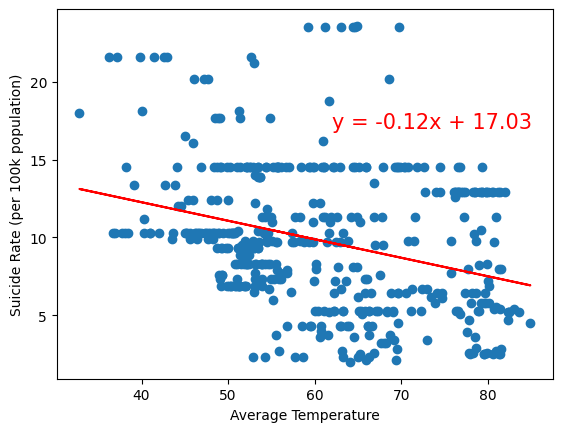

In [23]:
x_values = data_merge["temperature_2m_mean"]
y_values = data_merge["suicide rates (per 100k pop)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (62, 17), fontsize=15, color="red")
plt.xlabel("Average Temperature")
plt.ylabel("Suicide Rate (per 100k population)")
print(f"The r-squared is: {rvalue**2}")
plt.show()